<h1>Tutorial OpenMSI Arrayed Analysis Tools</h1>
<h2>Introduction</h2>
Mass spectrometry imaging (MSI) enables the mass analysis of thousands of spatially defined samples, and can be applied in the high-throughput screening of, for example, enzyme activity or compound libraries. Here we present OpenMSI Arrayed Analaysis Tools, an Python based software tool for the analysis of spatially defined samples with MSI.

This tutorial Notebook ([Tutorial_OpenMSI_Arrayed_Analysis_Tools](link to notebook in reposetory)) will demonstrate the basic features of OpenMSI Arrayed Analaysis Tools, with step by step guidance on how to run the Jupyter/iPython Notebook. A normal version, without the turtorial markdown, is also available ([OpenMSI_Arrayed_Analysis_Tools](link to notebook in reposetory)). Furthermore, a version showcasing advanced capabilities and no mardown is also available ([Advanced_OpenMSI_Arrayed_Analyis_Tools](link to notebook inreposetory). To complete this tutorial, one would need:
<ul>
<li>Jupyter/iPython. OpenMSI Arrayed Analaysis Tools requires Jupyter version 4.1+ and Python version 2.7+ or 3.2+. Further information on iPython/Jupyter can be found at and http://ipython.org/. </li>
<li>The following Python packages:<ul>
<li>numpy</li>
<li>matplotlib</li>
<li>requests</li>
<li>pandas</li>
<li>future (for Python 2.7)</li>
</ul></li>
<li>For this tutorial, an OpenMSI account is **not** required. However, in order to analysis the users' own files, an OpenMSI account is required. An OpenMSI account can be obtained through the OpenMSI team and NERSC (https://openmsi.nersc.gov/openmsi/client/omsiAccount) at no cost.</li>
</ul>

If the interactive dialogs do not appear, try running Jupyter explicitly from the command line using the "jupyter notebook" command. Many shortcuts will call the deprecated "ipython notebook" in stead.

Users don't have to provide a MSI data file. For this tutorial, we have selected the usage of the [20120913_nimzyme](https://openmsi.nersc.gov/openmsi/openmsi/client/viewer/?file=%2Fproject%2Fprojectdirs%2Fopenmsi%2Fomsi_data_private%2Fbpb%2F20120913_nimzyme.h5&dataIndex=0&expIndex=0&channel1Value=880.8804&channel1RangeValue=0.17336625653&channel2Value=1011.9626&channel2RangeValue=0.17336625653&channel3Value=1143.0448&channel3RangeValue=0.17336625653&rangeValue=0.17336625653&cursorCol1=51&cursorRow1=35&cursorCol2=102&cursorRow2=71&enableClientCache=false) MSI data set (as used in the [manuscript](link to paper), which is publicly available.

<h2>How to use this Jupyter/iPython Notebook</h2>
*An interactive demo for new users of Jupyter/iPython notebooks can be found at [Nature](http://www.nature.com/news/ipython-interactive-demo-7.21492)*

In this tutorial, there are 2 types of content, namely text and code. This content is placed in boxes called "cells". If you click around on this page, you'll see different cells highlighted. To execute each cell (regardless of content), you hit on your keyboard SHIFT+ENTER or press the play button. If the cell contains text, the content will be displayed directly. If the cell contains code, the code will be executed. 

<h2>Cell 1. Loading Arrayed Analysis Tool</h2>
Execute the cell below to load the OpenMSI Arrayed Analysis Tool. It should load in about 15 seconds
<p>_--When succesful, the message "Completed loading OpenMSI Arrayed Analysis Toolkit" will appear--_

In [1]:
import omaat_lib as omaat
%matplotlib notebook

<h2>Cell 2. Log into OpenMSI</h2>
Execute the cell below. When the cell is executed, the user is asked to put in their NERSC/OpenMSI username. 
<p>After entering their username, the user is asked to put in their NERSC/OpenMSI password. _--If login is succesful, the message "Login appears to be successful!" will appear--_<p>
<p> __--Log in is not required for this tutorial. However, in order to analysis the users' own files, logging into OpenMSI is required--__

In [2]:
openMSIsession = omaat.login()

Login appears to be successful!


<h2>Cell 3. File and ion selection</h2>
After a successful login, executing the file selector cell will prompt a list of the users available OpenMSI files. _--If not logged into OpenMSI, only the publicly available OpenMSI files will be displayed, including the file used in this tutorial--_
<ul>
<li> Next, select the file (name file) by clicking on the file name.
<li> Then, put in the corresponding Experiment Index and Data Index to the file you want to analysie. For this tutorial, put in '0' for both indexes. 
<li> Next, provide the m/z values of the ions for analysis. Insert the m/z value in the 'Add an ion' box, and click the 'Add Ion" button. The value will appear in the box 'Select which ions you want to load'. For the tutorial, add the following m/z values: 1241.25, 1079.35, 1141.35, and 979.40.
<li> Ions can be removed be first clicking on the m/z value in the 'Select which ions you want to load' box and then on the 'Remove Ion' button.
<li> Then, put in the value for the integrate at +/- this amount of the inserted m/z values. Users can choose between 'absolute m/z values' or '% of m/z'. For this tutorial select the 'absolute m/z values' and set it at 0.2.
<li> Last, using the given parameters, a base image has to generated. To do this, the user has to click on the 'Load Image!' button. _--After clicking on the 'Load Image!' button, the line "Loading image... " will appear. The progress of loading the separate ions will be displayed, in the form of "loading ion 1 of x. m/z = x"--_ ___--When loading has completed, the message "Image has been loaded." will appear--___  
<ul>

In [3]:
omaat.get_default_params()

{'arrayed_analysis_columns': 24,
 'arrayed_analysis_default_filename': 'bpb/20120913_nimzyme.h5',
 'arrayed_analysis_default_username': 'bpb',
 'arrayed_analysis_minScore': 0,
 'arrayed_analysis_offset': 0,
 'arrayed_analysis_radius': 2,
 'arrayed_analysis_rows': 16,
 'openmsi_default_ions': [979.4, 1079.35, 1141.35, 1241.25]}

In [4]:
if "openMSIsession" not in locals():
    openMSIsession=omaat.OpenMSIsession()
openMSIsession.imageLoader_with_dialogs() #once loaded the image will be stored in the "img" variable

Loading image...
loading ion 1 of 4. m/z = 979.400000 +/- 0.500000
Time to load ion: 0.31321287155151367 seconds
loading ion 2 of 4. m/z = 1079.350000 +/- 0.500000
Time to load ion: 0.29149889945983887 seconds
loading ion 3 of 4. m/z = 1141.350000 +/- 0.500000
Time to load ion: 0.3568711280822754 seconds
loading ion 4 of 4. m/z = 1241.250000 +/- 0.500000
Time to load ion: 0.35950708389282227 seconds
Image has been loaded.


<h2>Cell 4. Display base image</h2>
In order to display the generated base image, execute the cell below. The base image will be displayed in new window. The base image is the ion-intensity vizualization of all selected ions and will be used for mask placement. 
<p> _--For this tutorial, this step is optional--_
<p>___--In order to continue with running the next cell in the iPython notebook, the base image figure window has to be closed--___


<IPython.core.display.Javascript object>


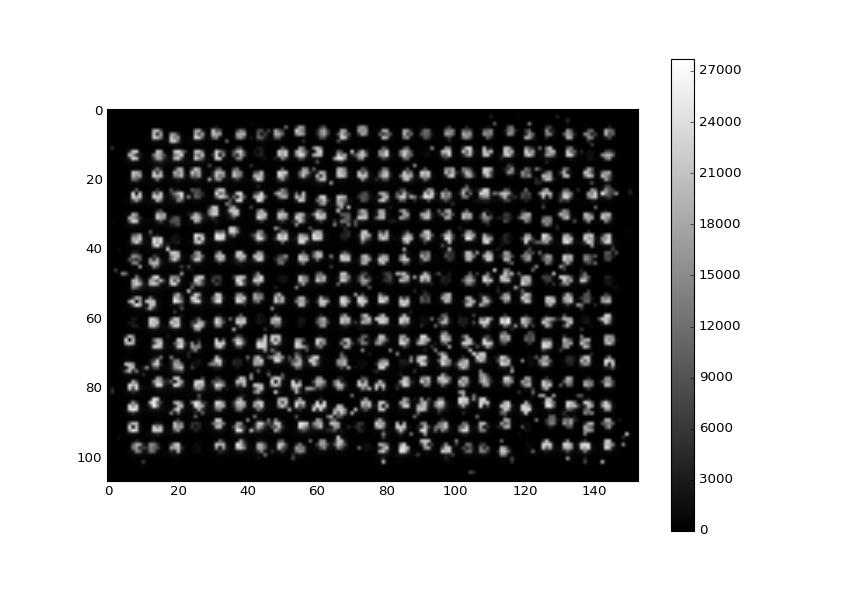

In [5]:
from matplotlib import pyplot as plt
import numpy as np
Zzoom=1 #set this to a higher number to see a narrower range of values (useful if one pixel is way brighter than the rest)
plt.figure(num = 'Base Image')
plt.imshow(openMSIsession.img.baseImage,cmap='gray',clim=(0.0,np.amax(openMSIsession.img.baseImage)/Zzoom))
plt.colorbar()
# putWindowOnTop()
plt.show()

<h2>Cell 5. Placing trapezoidal mask</h2>
By executing the cell below, a trapezoidal mask containing individual markers will be generated. The size of the trapezoid and the number of markers is determined by number of rows and columns. For this tutorial, generate a trapezoid with **16 rows and 24 columns**. When the cell is executed, the base image with the trapezoidal mask will be displayed in new window.
<p> Then, the trapezoidal mask is roughly placed over the arryaed samples; optimization of positioning of the individual markers will be performed in the next cells. The mask can be moved by dragging the corner markers of the trapezoid (highlighted with red halos) to the prefered position. For this tutorial, place the trapezoidal mask by dragging the corner markers of the trapezoid to the corner samples. Since the top right corner doesn't contain samples, roughly position the top right marker so that the top row and right column markers allign with the samples.
<p>The Hexagonal Offset, which can be a decimal number, moves every other row that many spots to the right. If you want a traditional hexagonally tiled mask, set the Hexagonal Offset to 0.5 to move every other row to the right, or set it to -0.5 to move every other row to the left. 
<p>__--To continue, the base image figure window has to be closed. The last coordinates of the mask will be stored.--__

Number of columns? leave blank for default ("24") 
Number of rows? leave blank for default ("16") 
Hexagonal Offset? This shifts every other line by this many spots. leave blank for default ("0.000000") 


<IPython.core.display.Javascript object>


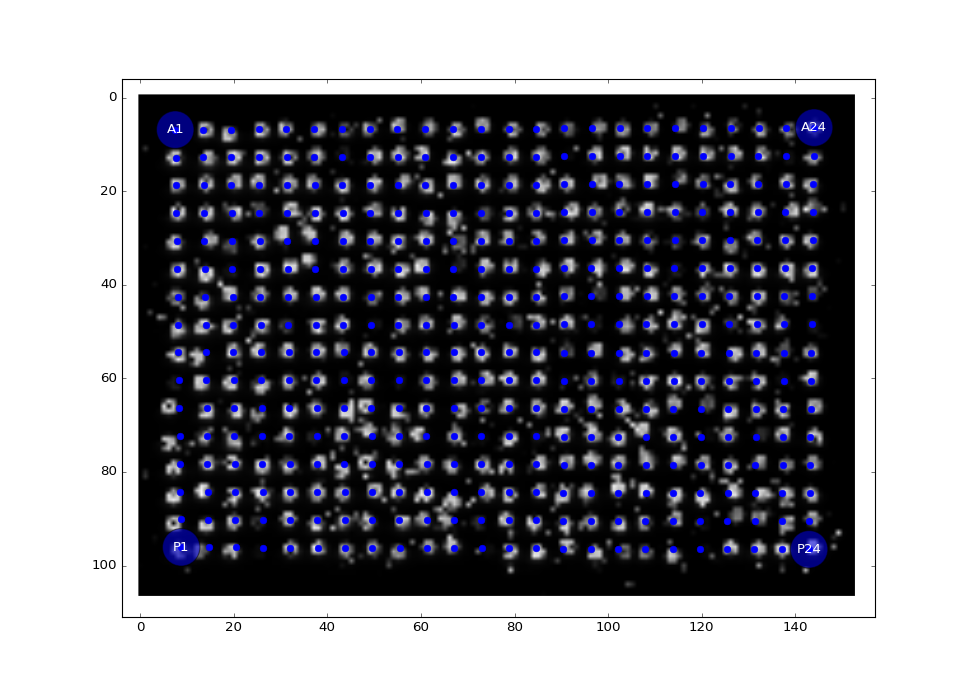

In [6]:
openMSIsession.img.roughPosition_with_dialogs()

<h2>Cell 6. Automatic spot optimization</h2>
In the next cell, the Jupyter notebook will optimze the marker position. For detials on the optimization algorithm, see the method section in the [manuscript](link to paper). For this tutorial, perform the automatic spot optimization.
<ul>
<li> First, put in the integration radius for the individual markers in the mask. For the tutorial, put in 2. 
<li> Then, put in the number of rounds of optimization. For this tutorial, put in 3. 
<li> Next, put in the number of pixels how far away from the current location should the algorithm searches. For this tutorial, put in 2.
<li> Then, if you don't want that the markers will overlap after optimalization, check the box. For this tutorial, check the box.
<li> Next, give weighting values for each ion. For this tutorial, put in 1 for all ions. 
<li> You can calculate the scores for the current marker locations, by clicking on the 'Calculate scores for current spot locations' button. Optimal scores will be x. For this tutorial, you can skip this step.
<li> Then, put in the minimum score necessary to move a marker. For this tutorial, put in 1. 
<li> Last, using the given parameters, the marker position can be optimized. To do this, the user has to click on the 'Optimize Spots!' button. _--After clicking on the button, the progress of the optimization will be displayed. When optimization is completed, the message "optimization routine completed. new spot x and y positions saved." will appear--_

<p> _--Performing the spot optimization is optional. Individual markers can be positioned manually in the cell 'Displaying optimized markers(s) positioning'--_

In [7]:
#automagically optimize the spot centers to correspond to the actual spots on the image
openMSIsession.img.optimizeSpots_with_dialogs()

done with optimization round 1 of 3
done with optimization round 2 of 3
done with optimization round 3 of 3
optimization routine completed. new spot x and y positions saved.


<h2>Cell 7. Displaying and finetuning optimized marker positioning</h2>
In order to view the optimized marker postioning, execute the cell below. The base image will be displayed in new window. Individual markers can be moved by dragging the markers to the preferred postion.
<p>The radius of the circular spot markers in this tool is not necessarily the same as your actual integration radius, though we have tried our best to make it a reasonable approximation. Use the "Calculating spot areas" cell below to see the shapes of your actual calculated spots</p>
<p>If no automatic spot optimization was performed, the trapezoidal mask will be at same postion as it was. Still, individual markers can be moved by dragging the markers to the preferred postion.
<p>___--In order to continue with running the next cell in the iPython notebook, the base image figure wondow has to be closed. The last coordinates of the mask will be stored--___

<IPython.core.display.Javascript object>


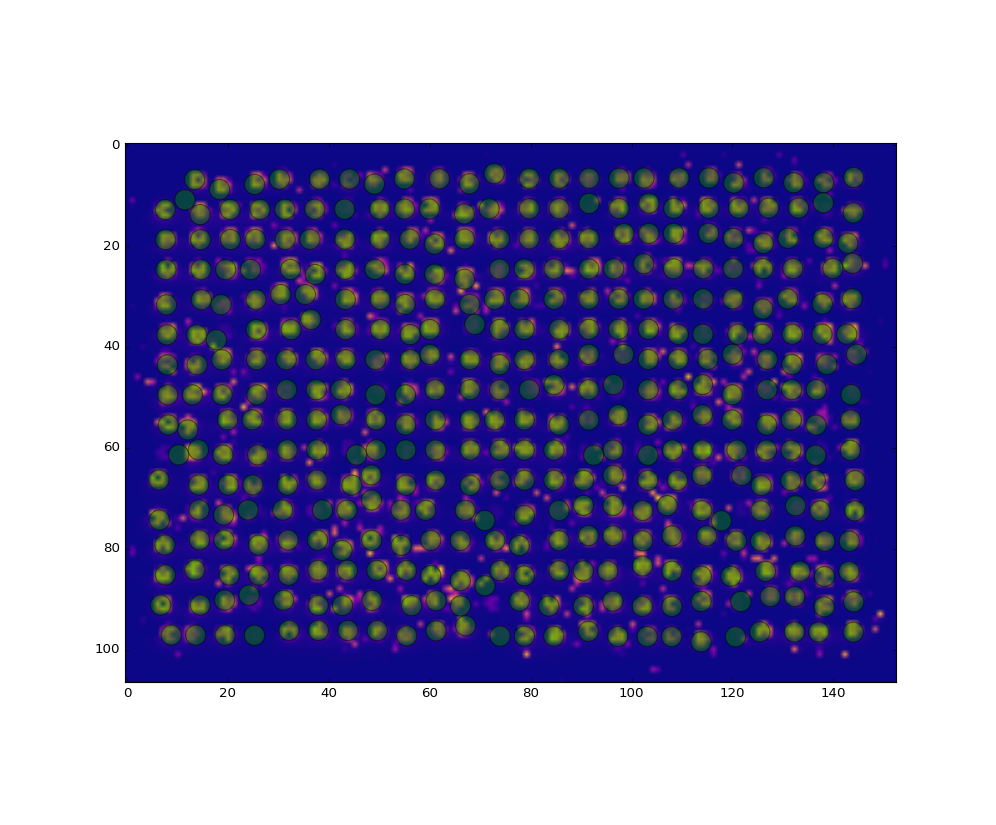

In [11]:
#check the positions of the spots and manually adjust them if need be
radius=arrayed_analysis_radius if ("arrayed_analysis_radius" in locals()) else 2
openMSIsession.img.fineTunePosition(markerRadius=radius,colormap='plasma',markercolor='green')

<h2>Cell 8. Saving Arrayed Image</h2>
If needed, the arrayed image, including the coordinates of the spots, can be stored in a 'pickle' file. First, enter a name between the parentheses, replacing name_pickle_file. Then execute the cell to save the file. 
<p> _--For this tutorial, saving the mask position is optional--_

In [ ]:
#Optional: Save the ArrayedImage into a pickle file.
filename="filename.arrayed_img"
import pickle
pickle.dump(openMSIsession.img, open(filename,"wb"))
print("Done saving.")

<h2>Cell 9. Loading saved mask position</h2>
Saved arrayed images can be loaded from a pickle file. Enter the name of the saved pickle file between the parentheses, replacing name_saved_pickle_file. Then, execute the cell to load the file. 
<p> _--For this tutorial, this step is optional--_

In [ ]:
#Optional: Load an ArrayedImage from a pickle file. This way you can work off-line
filename="filename.arrayed_img"
import pickle
img=pickle.load(open(filename,"rb"))
print(img)

<h2>Cell 10. Calculating the spot areas, and final inspection</h2>
Execute the cell below, to calculate which pixels belong to which spot. The integration radius of the markers can be adjusted, but if you leave it as-is, the same number you used in the optimization stage will be used.
A visual representation of the marker size and positioning will be genreated for visiual inspection.
<p>--The message "x spots generated. number of spots with N pixels:{x: x, x: x}" will appear--_

384 spots generated. number of spots with N pixels:{10: 1, 11: 3, 12: 115, 13: 143, 14: 122}


<IPython.core.display.Javascript object>


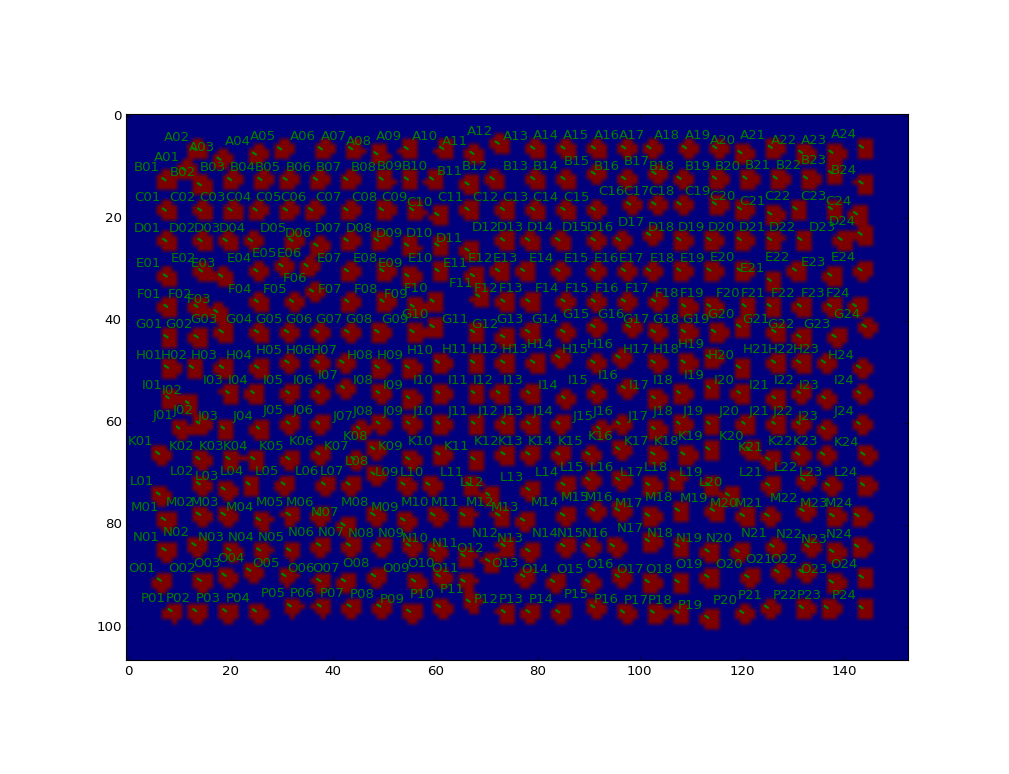

In [12]:
#You'll need to call this function. It returns a list of spots (where each spot is a list of pixels),
#which is also stored inside the object.

# line 536
# see if default_params overwrites parameters specified as kwargs

arrayed_analysis_radius = 2
#this is the same integration radius that you set in the optimization step

spots=openMSIsession.img.generateSpotList(integrationRadius=arrayed_analysis_radius)

openMSIsession.img.showMaskedImage(spotList=spots,alphaRows=True)


<h2>Cell 11. Exporting results into a comma-separated text file</h2>
The next cell is used to save the results of the arrayed analysis tool as a table into a .csv file. It name the file after the current date and time, but if you want to give the file a specific name, enter the name between the quotes after filename=,

The file will contain a comma-separated file which you could open in Excel to do further data anlysis.

In [13]:
#Write results to a file
#if you don't pass it an explicit spotList it will use the spot set stored in the ArrayedImage
filename="omaat_results_table"  #.csv extension will be automatically added
openMSIsession.img.writeResultTable(fileName=filename,alphaRows=True)

/Users/bpb/repos/omaat/omaat_results_table.csv

<h2>Cell 12. Using pandas to perform programmatic data analysis</h2>
If you prefer to use Pandas over Excel to do data analysis, the resultsDataFrame method returns a Pandas dataframe with the same kind of information that the writeResultTable method gives.
In this example, we compute the first ion as a percentage of all ions loaded, and plot those percentages, from small to large, using matplotlib. 

/Users/bpb/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


<IPython.core.display.Javascript object>


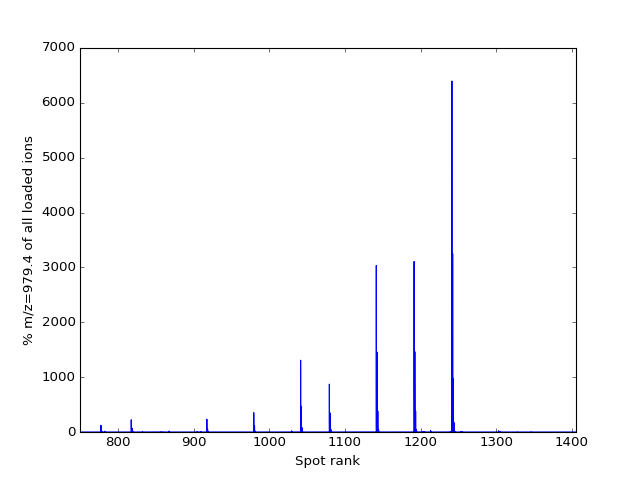

ion        979.40                                              1079.35  \
descriptor     sum        mean median   min    max num_pixels      sum   
A01           80.0    5.714286    5.0   5.0   10.0       14.0    102.0   
A02         1005.0   71.785714   32.0   5.0  250.0       14.0   1142.0   
A03         5342.0  410.923077  364.0  10.0  947.0       13.0  60382.0   
A04          630.0   48.461538   27.0   5.0  190.0       13.0   1317.0   
A05          777.0   59.769231   54.0   5.0  179.0       13.0   1043.0   

ion                                       ...     1141.35                  \
descriptor         mean  median    min    ...      median    min      max   
A01            7.285714     5.0    5.0    ...        40.5   21.0    299.0   
A02           81.571429    43.5    5.0    ...      3904.5    5.0   8322.0   
A03         4644.769231  5397.0  305.0    ...      7216.0  288.0  11405.0   
A04          101.307692    38.0   10.0    ...      2728.0   76.0   7331.0   
A05           80.230769    59.0    5.0    ...      3589.0   10.0   7864.0   

ion                    1241.25                                                  
descriptor num_pixels      sum         mean  median    min      max num_pixels  
A01              14.0   2482.0   177.285714   130.0   49.0    506.0       14.0  
A02              14.0  93021.0  6644.357143  7074.5    5.0  13790.0       14.0  
A03              13.0   8234.0   633.384615   746.0   59.0   1258.0       13.0  
A04              13.0  94036.0  7233.538462  6143.0  266.0  15904.0       13.0  
A05              13.0  82034.0  6310.307692  6644.0   32.0  13513.0       13.0  

[5 rows x 24 columns]

In [17]:
df=openMSIsession.img.resultsDataFrame(minPixelIntensity=0,alphaRows=True) #generate the dataframe
# IPython.display.display(df)

sums_df=df.loc[:,(slice(None),'sum')] #get the sums from the dataframe
sums_df.columns = sums_df.columns.get_level_values(0) #name the columns to make indexing easier later
percentage_firstion=100.0*sums_df[openMSIsession.img.ions[0]]/sums_df.sum(axis=1) #calculate the percentage
percentage_firstion.sort() #rank the data from low to high. Using sort() instead of sort_values(inplace=True) for backward compatibility
plt.figure()
plt.bar(range(len(percentage_firstion)),percentage_firstion,edgecolor='b') #define a bar chart
plt.xlabel('Spot rank') #set x axis label
plt.ylabel("% m/z={:.1f} of all loaded ions".format(openMSIsession.img.ions[0])) #set y axis label
plt.xlim(0,len(percentage_firstion)-1) #set x axis range
plt.show()
df.head()

<h2>Viewing and manipulating spot spectra</h2>
You can request the average spectra for your spots from the OpenMSI server.
The toolkit can return the spectral data as a dataframe, which makes plotting straight-forward

Quite a lot of data needs to be transferred between the server and this script, so allow some time
for this example to run

Finished loading spectrum 1 out of 384
Finished loading spectrum 2 out of 384
Finished loading spectrum 3 out of 384
Finished loading spectrum 4 out of 384
Finished loading spectrum 5 out of 384
Finished loading spectrum 6 out of 384
Finished loading spectrum 7 out of 384
Finished loading spectrum 8 out of 384
Finished loading spectrum 9 out of 384
Finished loading spectrum 10 out of 384
Finished loading spectrum 11 out of 384
Finished loading spectrum 12 out of 384
Finished loading spectrum 13 out of 384
Finished loading spectrum 14 out of 384
Finished loading spectrum 15 out of 384
Finished loading spectrum 16 out of 384
Finished loading spectrum 17 out of 384
Finished loading spectrum 18 out of 384
Finished loading spectrum 19 out of 384
Finished loading spectrum 20 out of 384
Finished loading spectrum 21 out of 384
Finished loading spectrum 22 out of 384
Finished loading spectrum 23 out of 384
Finished loading spectrum 24 out of 384
Finished loading spectrum 25 out of 384
Finished 

<IPython.core.display.Javascript object>


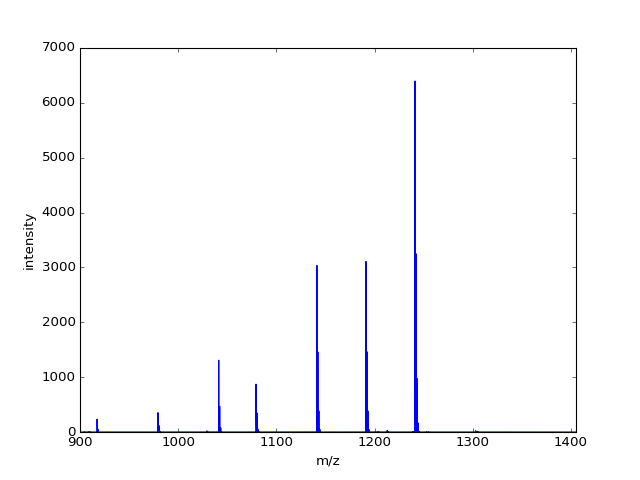

<IPython.core.display.Javascript object>


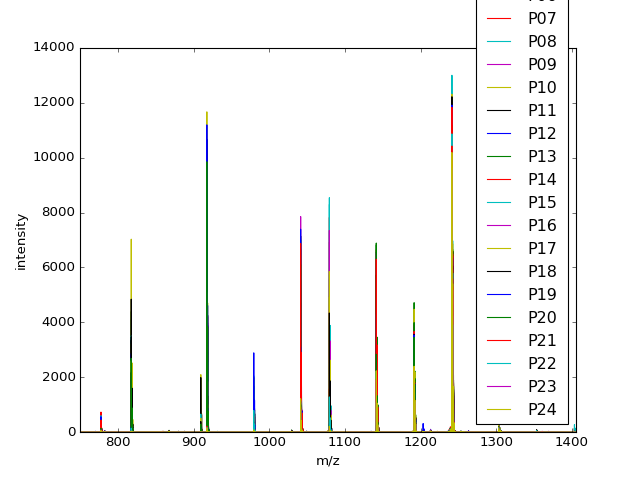

In [19]:
spectra_df=openMSIsession.getSpotSpectra(openMSIsession.img,verbose=True) #Loads the spectra from the OpenMSI server
                                                           #It's  lot of data, so save the desulting dataframe
                                                           #so that you dont have to run this method repeatedly.
        
A01_spectrum=spectra_df["O08"] # get only the spectrum for the spot at location A01
A01_spectrum.plot() #plot the entire spectrum for spot A01
plt.figure()
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()
A01_spectrum[900:1950].plot() #plot only the m/z values between 900 and 1200
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()
spectra_df.plot() # plot ALL the spectra that are loaded on top of each other.
                  #Depending on how many spots are in your image, this can be
                  #a LOT of data, if you don't have a good computer this might crash.
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()